<a href="https://colab.research.google.com/github/swapnilsethi/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read data from github
URL = "https://raw.githubusercontent.com/swapnilsethi/Linear-Regression/master/univariate.txt"
data = pd.read_csv(URL, header=None, sep= ",", names=["Population", "Profit"])


In [4]:
#EDA
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


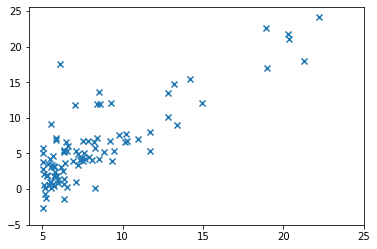

In [5]:

# As we know, there are only two columns in our dataset profit and Population, we can use scatter plot to visualize it.
#pd.plotting.scatter_matrix(data)

plt.scatter(data["Population"],data["Profit"],marker="x")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.title = "Population vs Profit"
plt.xlabel = "Porpulation of City in 10,000s"
plt.ylabel = "Profit in $10,000s"
plt.show()


In [6]:
#Computing Cost(J(Θ))

def computeCost(X, y, Θ):
  m = len(y)     # Number of training example
  predictions = X.dot(Θ)
  square_err = (predictions-y)**2
  J = (1/(2*m)) * (np.sum(square_err) ) 
  return J

In [7]:
#Initialize X,y and compute the cost of using Θ = (0,0)
data_n=data.values
m=len(data_n[:,-1])
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
Θ = np.zeros((2,1))

computeCost(X,y,Θ)

32.072733877455676

In [8]:
computeCost(X,y,[[-1], [2]]) #non-zero theta


54.24245508201238

In [9]:
#Gradient descent
def gradient_descent(X, y, Θ, α, num_iters):
  m = len(y)
  #J_history = np.zeros([num_iters,1])
  J_history =[]
  for i in range(num_iters):
    predictions = X.dot(Θ)
    diff = (predictions-y)
    error = np.dot(X.transpose(),diff)
    Θ = Θ - (α* 1/m * error)
    J_history.append(computeCost(X,y, Θ))
  return Θ, J_history

In [10]:
α =0.01
iterations = 1500
Θ,J_history = gradient_descent(X,y, Θ, α, iterations)
print('Θ computed from gradient descent are: ' + str(round(Θ[0,0],4)) + "  " + str(round(Θ[1,0],4)))
print("h(x) = " + str(round(Θ[0,0],4)) + " + "+ str(round(Θ[1,0],4))+ "X1")

Θ computed from gradient descent are: -3.6303  1.1664
h(x) = -3.6303 + 1.1664X1


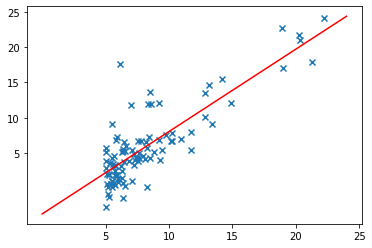

In [11]:
plt.scatter(data["Population"],data["Profit"],marker="x")
x_value=[x for x in range(25)]
y_value=[y*Θ[1]+Θ[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(5,30,step=5))
plt.title = "Population vs Profit"
plt.xlabel = "Porpulation of City in 10,000s"
plt.ylabel = "Profit in $10,000s"
plt.show()

In [15]:
def predict(x,Θ):
   predictions= np.dot(Θ.transpose(),x)
   return predictions[0]

predict1=predict(np.array([1,3.5]),Θ)*10000
predict1

4519.767867701768